In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv("../../output/current_values.csv", index_col=0)


hf = pd.read_csv("../../output/Codes/2digit_occupations.csv", index_col=0)
hf = hf.set_index("codes")
cf = pd.read_csv("../../output/Codes/1digit_occupations.csv", index_col=0)
cf = cf.set_index("codes")


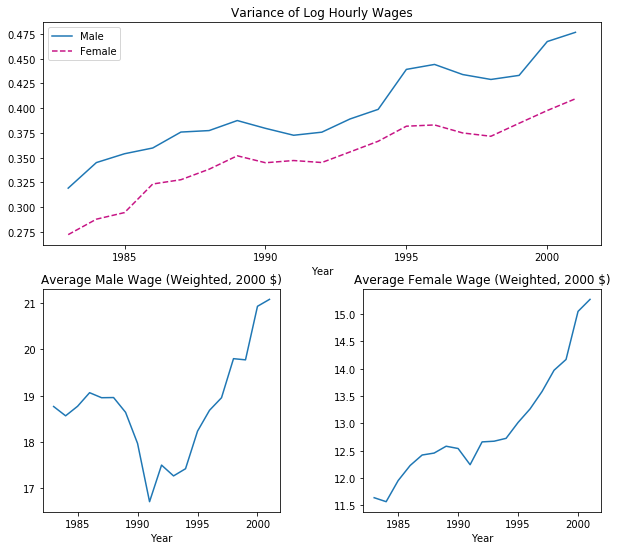

In [3]:
df = df[(df["Female"]!=0) | (df["Male"]!=0)]

grouped = df.groupby(["Female","Year"])
arrays = []

for x in df.sort_values(by="Female")["Female"].unique():
    for y in df.sort_values(by="Year")["Year"].unique():
        arrays.append(grouped.get_group((x,y))[["Female","Year", "Asecwt", "Wage"]].to_numpy())
plt.figure(figsize=[10,10])
years = []
averages = []
digit = 0
for array in arrays:
    values = array[:,-1]
    weights = array[:,2]
    year = array[0,1]
    female = array[0,0]
    average = np.average(values, weights=weights)
    if female != digit:
        plt.subplot(2,2,3)
        plt.plot(years,averages)
        plt.xticks(np.arange(1985, max(years), 5.0))
        plt.xlabel("Year")
        plt.title("Average Male Wage (Weighted, 2000 $)")
        digit = female
        years=[]
        averages=[]
    years.append(year)
    averages.append(average)
plt.subplot(2,2,4)
plt.plot(years,averages)
plt.xticks(np.arange(1985, max(years), 5.0))
plt.xlabel("Year")
plt.title("Average Female Wage (Weighted, 2000 $)")


df["log Wage"] = np.log(df["Wage"])
grouped = df.groupby(["Female","Year"])
arrays = []

for x in df.sort_values(by="Female")["Female"].unique():
    for y in df.sort_values(by="Year")["Year"].unique():
        arrays.append(grouped.get_group((x,y))[["Female","Year", "Asecwt", "log Wage"]].to_numpy())
years = []
variances = []
digit = 1
plt.subplot(2,1,1)
for array in arrays:
    values = array[:,-1]
    weights = array[:,2]
    year = array[0,1]
    female = array[0,0]
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)
    if female == digit:
        plt.plot(years,variances,label="Male")
        digit = 0
        years=[]
        variances=[]
    years.append(year)
    variances.append(variance)
#sns.set_style("whitegrid")
plt.plot(years,variances,color = "mediumvioletred", linestyle="--",label="Female")
plt.xticks(np.arange(1985, max(years), 5.0))
plt.xlabel("Year")
plt.title("Variance of Log Hourly Wages")
plt.legend()
plt.subplots_adjust(wspace=0.35, bottom=0.2)

NameError: name 'df' is not defined